# Bike shearing demand prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data_path=r"C:\\Users\\hp\\Desktop\\Bike  sharing demand preddiction\\data\\SeoulBikeData.csv"
df=pd.read_csv(data_path,encoding="unicode_escape")
df.shape

(8760, 14)

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,26-08-2018,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760,NaN,NaN,NaN,704.602,644.997,0,191,504.5,1065.25,3556
Hour,8760,NaN,NaN,NaN,11.5,6.92258,0,5.75,11.5,17.25,23
Temperature(°C),8760,NaN,NaN,NaN,12.8829,11.9448,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760,NaN,NaN,NaN,58.2263,20.3624,0,42,57,74,98
Wind speed (m/s),8760,NaN,NaN,NaN,1.72491,1.0363,0,0.9,1.5,2.3,7.4
Visibility (10m),8760,NaN,NaN,NaN,1436.83,608.299,27,940,1698,2000,2000
Dew point temperature(°C),8760,NaN,NaN,NaN,4.07381,13.0604,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760,NaN,NaN,NaN,0.569111,0.868746,0,0,0.01,0.93,3.52
Rainfall(mm),8760,NaN,NaN,NaN,0.148687,1.12819,0,0,0,0,35


# Check Nul Value

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df["weekday"]=df["Date"].dt.day_name()
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

df.drop("Date",axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekday                    8760 non-null   objec

In [10]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017


# EDA

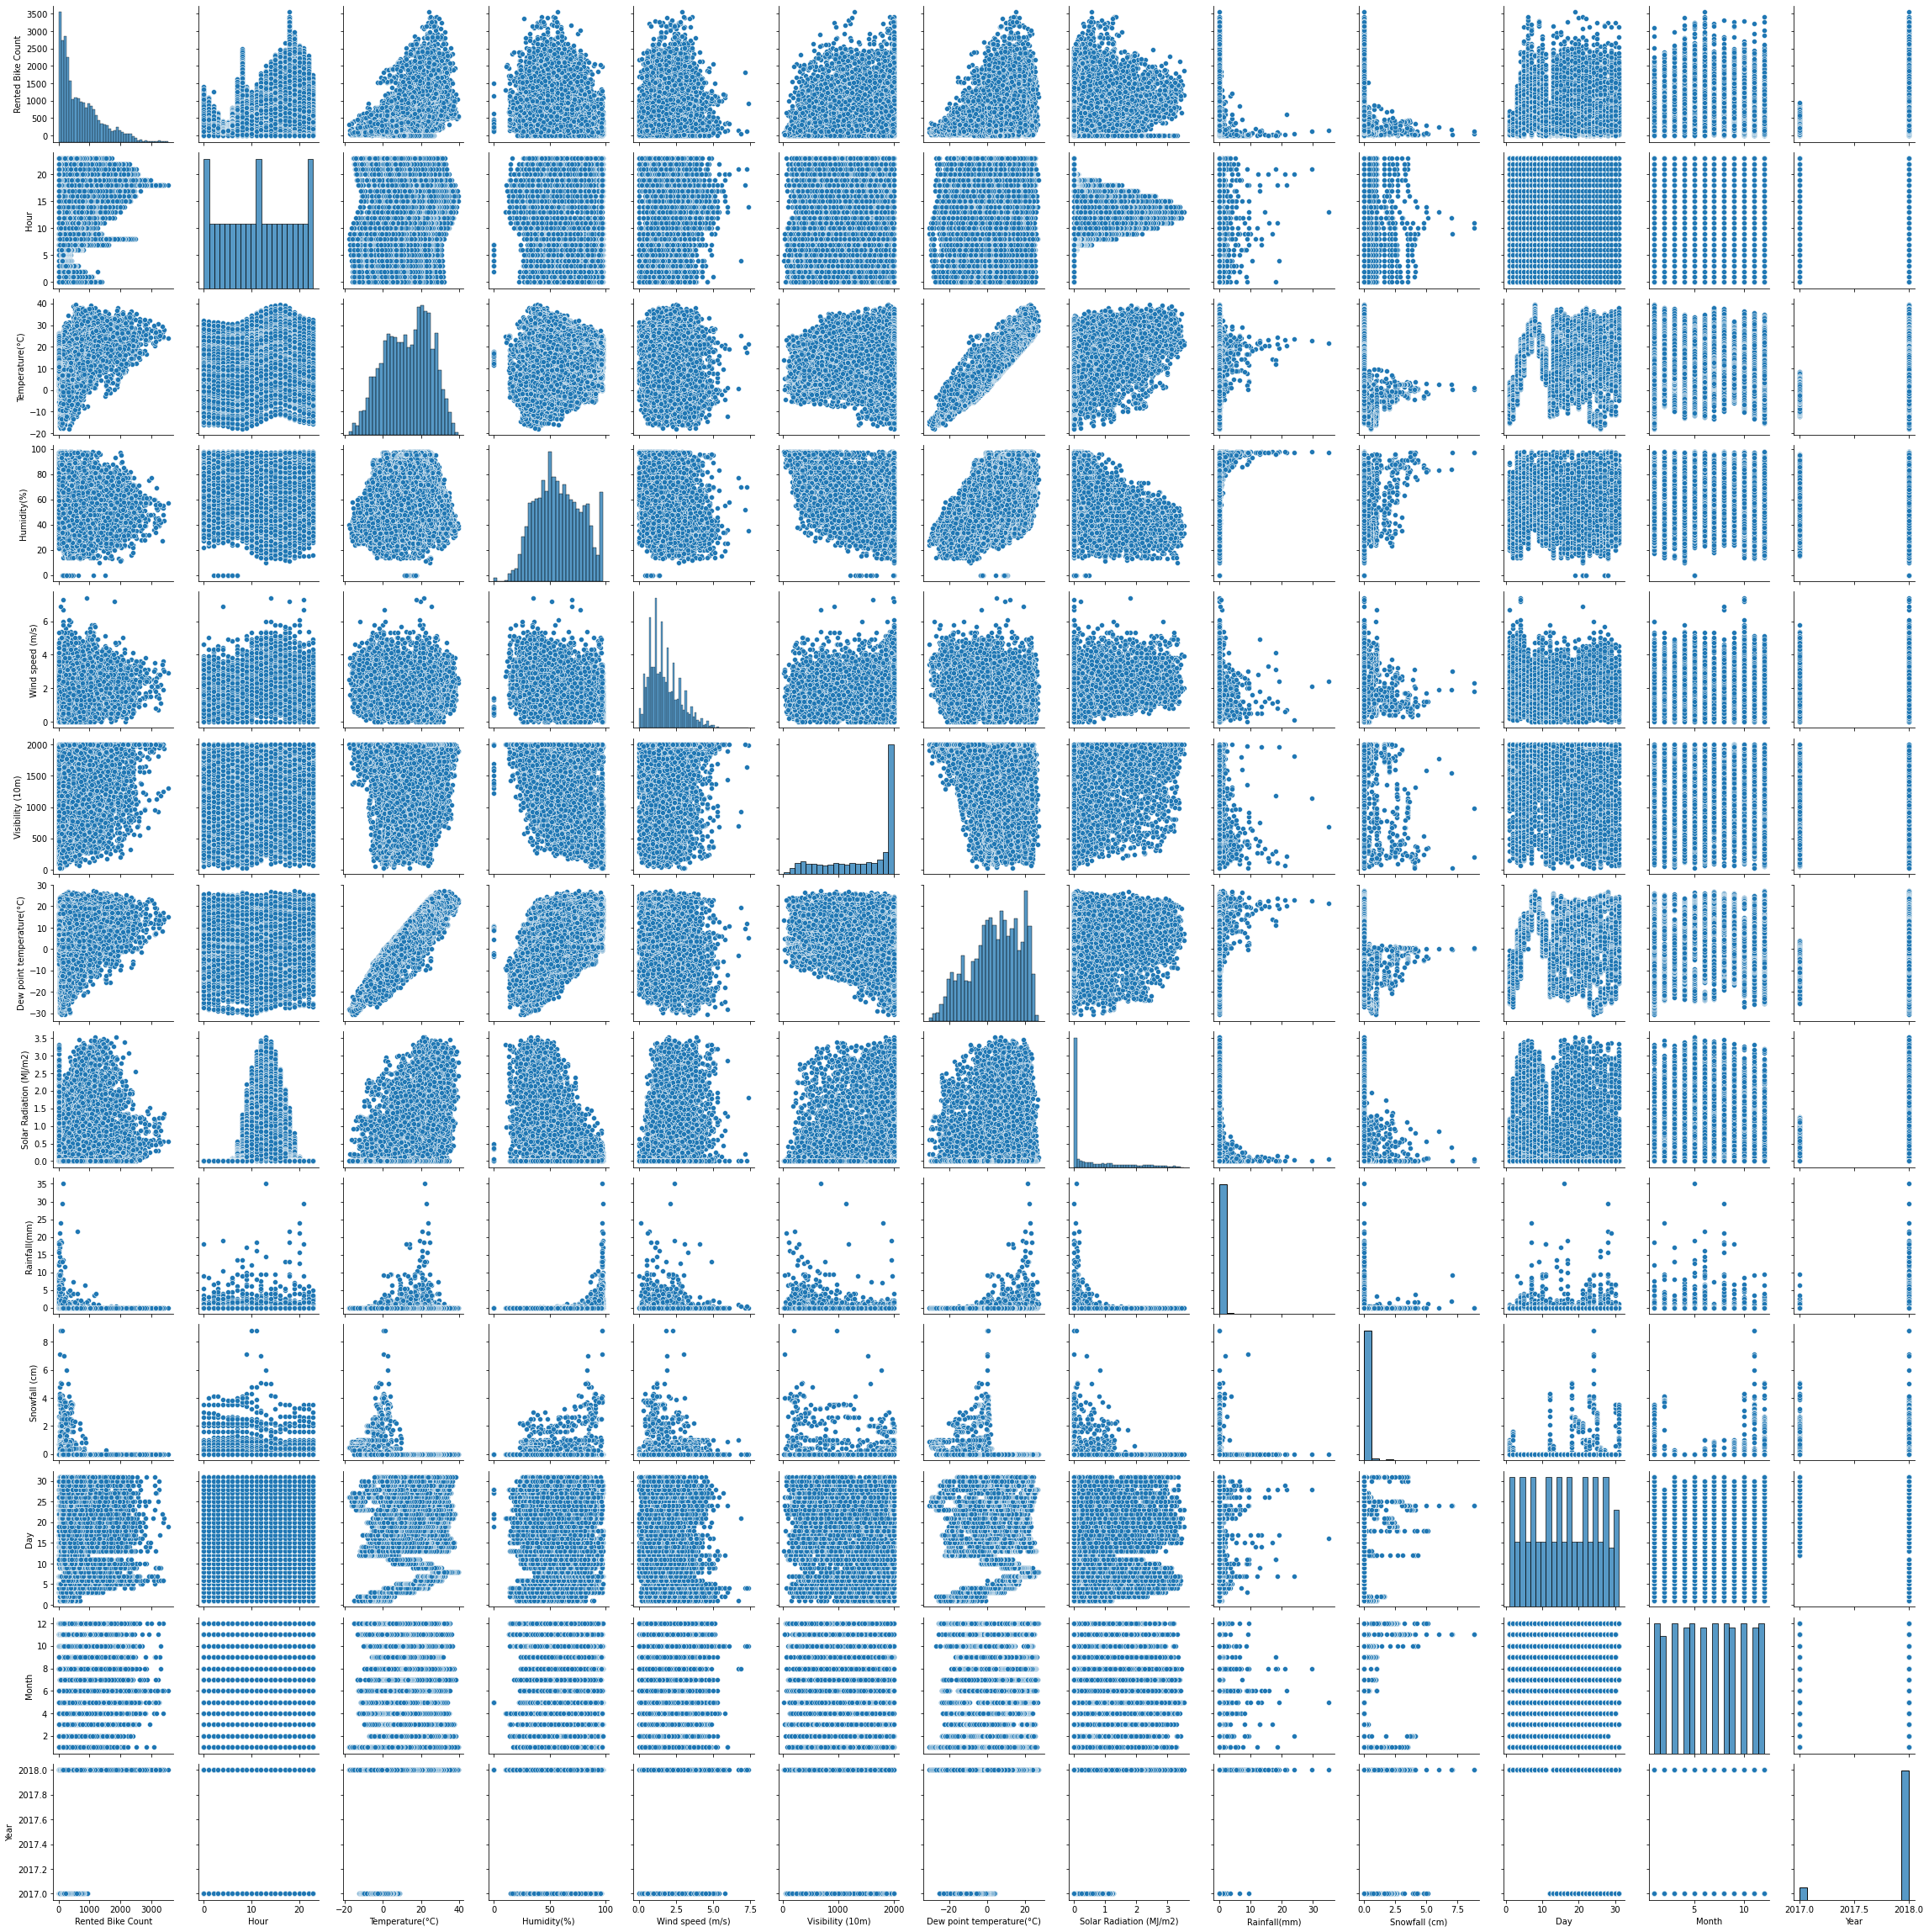

In [11]:
sns.pairplot(df)

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

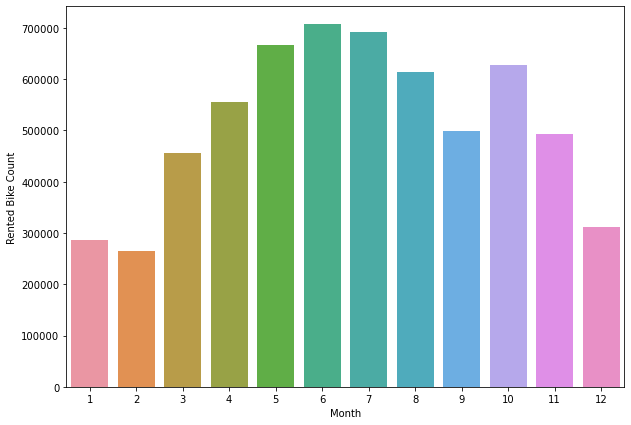

In [12]:
plt.figure(figsize=(10,7))
Month=df.groupby("Month").sum().reset_index()
sns.barplot(x="Month",y="Rented Bike Count",data=Month)

<AxesSubplot:xlabel='Day', ylabel='Rented Bike Count'>

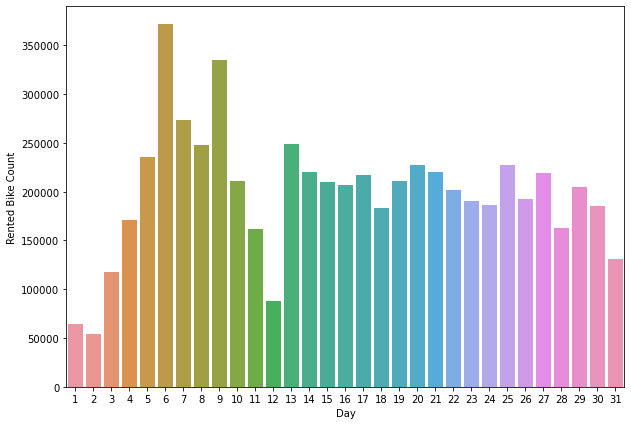

In [13]:
plt.figure(figsize=(10,7))
Month=df.groupby("Day").sum().reset_index()
sns.barplot(x="Day",y="Rented Bike Count",data=Month)

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

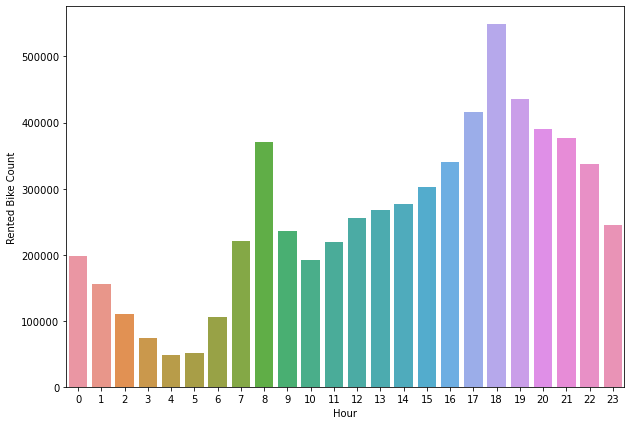

In [14]:
plt.figure(figsize=(10,7))
Hour=df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour",y="Rented Bike Count",data=Hour)

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

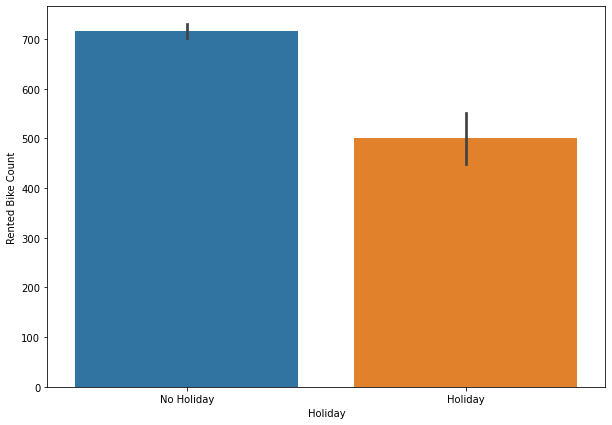

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(x="Holiday",y="Rented Bike Count",data=df)

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

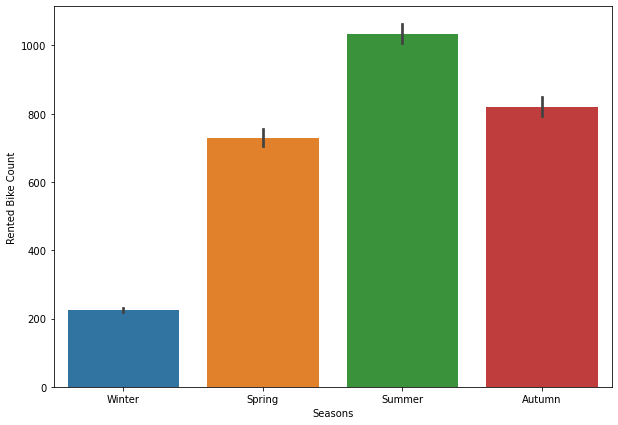

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons",y="Rented Bike Count",data=df)

<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

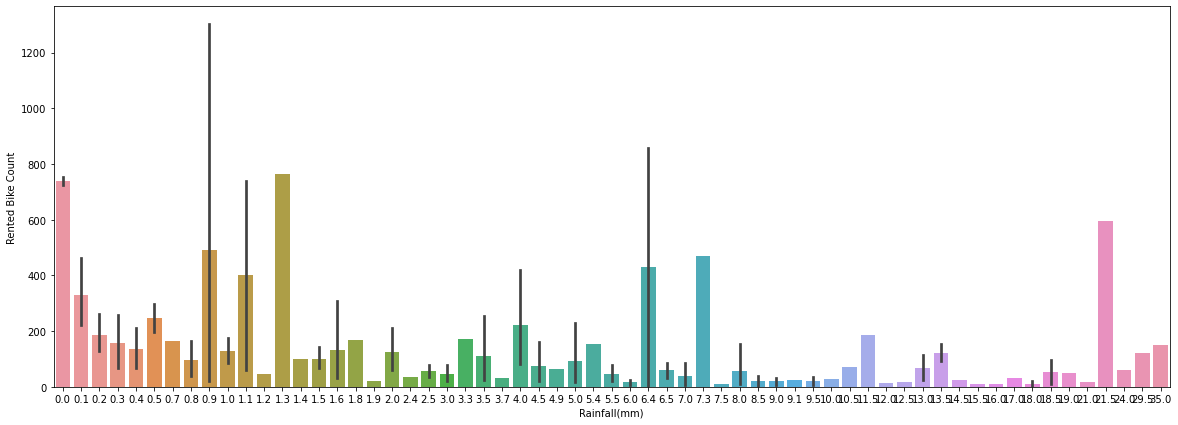

In [17]:
plt.figure(figsize=(20,7))
sns.barplot(x="Rainfall(mm)",y="Rented Bike Count",data=df)

<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

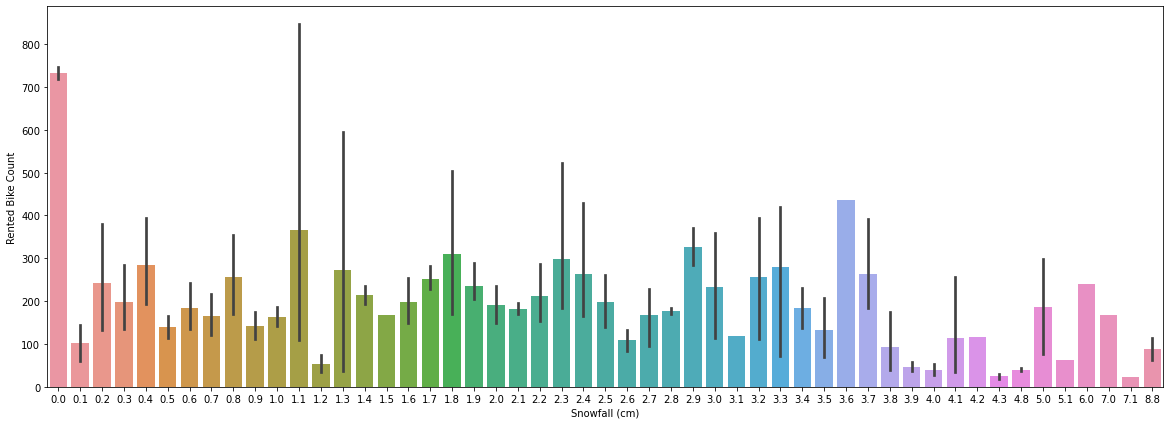

In [18]:
plt.figure(figsize=(20,7))
sns.barplot(x="Snowfall (cm)",y="Rented Bike Count",data=df)

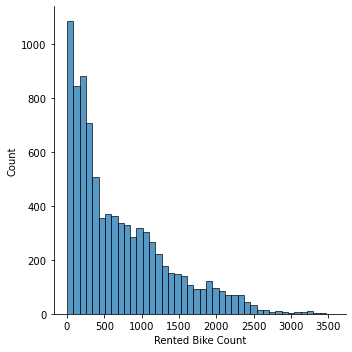

In [19]:
sns.displot(df["Rented Bike Count"])

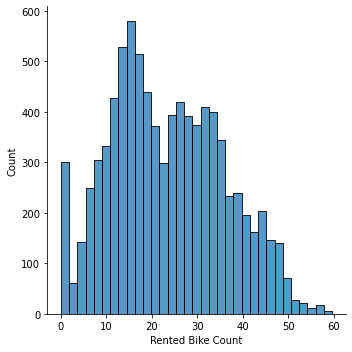

In [20]:
sns.displot(np.sqrt(df["Rented Bike Count"]))

## Skewed Data

In [21]:
df.skew().sort_values(ascending=True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

## Remove MultiCollinearity

<AxesSubplot:>

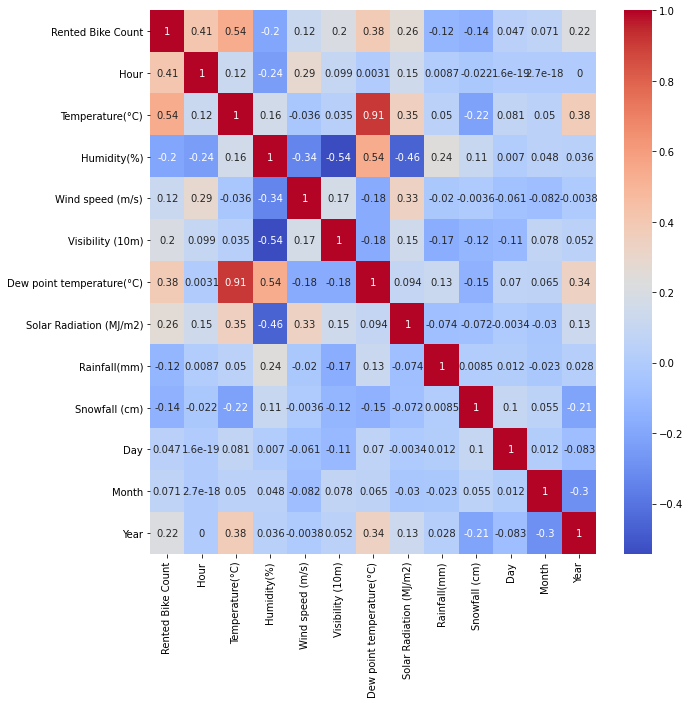

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [23]:
def get_vif(df):
    vif=pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF"]=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    
    return vif

In [24]:
not_for_vif=["Day","Month","Year","Rented Bike Count"]

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [25]:
not_for_vif=["Day","Month","Year","Rented Bike Count","Dew point temperature(°C)"]

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [26]:
df.drop(["Dew point temperature(°C)"], axis=1, inplace=True)

# Encoding

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [28]:
cat_features=["Seasons","Holiday","Functioning Day","weekday "]

In [29]:
df["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [30]:
df["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [31]:
df["Seasons"].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [32]:
df["weekday"].value_counts()

Sunday       1296
Tuesday      1272
Wednesday    1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: weekday, dtype: int64

In [33]:
df["Holiday"]=df["Holiday"].map({"No Holiday":0,"Holiday":1})
df["Functioning Day"]=df["Functioning Day"].map({"No":0,"Yes":1})

In [34]:
df_season=pd.get_dummies(df["Seasons"],drop_first=True)
df_weekday=pd.get_dummies(df["weekday"],drop_first=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [36]:
df=pd.concat([df,df_season,df_weekday],axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [38]:
df.drop(["Seasons","weekday"],axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
 14  Spring                  

In [40]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Year,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0


In [41]:
df.shape

(8760, 23)

## Split Data for Training & Testing

In [42]:
X=df.drop("Rented Bike Count",axis=1)
Y=df["Rented Bike Count"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2023)

print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (7008, 22)
Shape of Y_train:  (7008,)
Shape of X_test:  (1752, 22)
Shape of Y_test:  (1752,)


# Scaling

In [43]:
sc=StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test= sc.transform(X_test)

In [44]:
X_train[:2]

array([[ 1.51118219,  0.05556521, -2.10940521,  0.46658045,  0.92262892,
        -0.65681529, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        -1.32928272,  1.58736786,  0.30459857,  1.74132735, -0.58152447,
        -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
         2.4655198 , -0.41815465],
       [ 0.93371229,  1.00382241, -0.25185689,  1.82005277,  0.92262892,
         0.82386154, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        -1.10164234,  1.58736786,  0.30459857, -0.57427456,  1.71961809,
        -0.57866842, -0.39840954, -0.40773843, -0.41815465,  2.45255275,
        -0.40559398, -0.41815465]])

In [45]:
sc.mean_

array([1.15323916e+01, 1.28319920e+01, 5.81522546e+01, 1.71738014e+00,
       1.44041795e+03, 5.67796804e-01, 1.52539954e-01, 7.52283105e-02,
       4.92294521e-02, 9.67751142e-01, 1.56787957e+01, 6.51341324e+00,
       2.01791510e+03, 2.48002283e-01, 2.52711187e-01, 2.50856164e-01,
       1.36986301e-01, 1.42551370e-01, 1.48829909e-01, 1.42551370e-01,
       1.41267123e-01, 1.48829909e-01])

In [46]:
sc.scale_

array([6.92676802e+00, 1.20220548e+01, 2.04570722e+01, 1.03437653e+00,
       6.06508248e+02, 8.64469525e-01, 1.18093896e+00, 4.29006703e-01,
       2.16346743e-01, 1.76660323e-01, 8.78578762e+00, 3.45640534e+00,
       2.78737249e-01, 4.31853159e-01, 4.34566730e-01, 4.33505881e-01,
       3.43832888e-01, 3.49614755e-01, 3.55920731e-01, 3.49614755e-01,
       3.48296889e-01, 3.55920731e-01])

# Training ML Model

# Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr= LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [49]:
y_pred=lr.predict(X_test)

In [50]:
y_pred

array([  82.875826  ,  976.47642256, 1409.37670678, ..., 1544.96839026,
        504.51433769,  803.78036478])

# Model Evaluation

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [52]:
MSE= mean_squared_error(Y_test,y_pred)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(Y_test,y_pred)
R2=r2_score(Y_test,y_pred)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 188944.76470240724
RMSE : 434.67777111603857
MAE : 330.904441971385
R2 : 0.5371041582058085


In [53]:
def get_metrics(y_true,y_pred,model_name):
    MSE= mean_squared_error(Y_test,y_pred)
    RMSE=np.sqrt(MSE)
    MAE=mean_absolute_error(Y_test,y_pred)
    R2=r2_score(Y_test,y_pred)
    
    print(f"{model_name} : ['MSE' : {round(MSE,3)}, 'RMSE':{round(RMSE,3)},'MAE':{round(MAE,3)},'R2':{round(R2,3)}]")
    

In [54]:
get_metrics(Y_test,y_pred, "LinearRegression")

LinearRegression : ['MSE' : 188944.765, 'RMSE':434.678,'MAE':330.904,'R2':0.537]


# Train Mulitiple Models

In [72]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [73]:
rir = Ridge().fit(X_train,Y_train)
y_pred_rir=rir.predict(X_test)

lar=Lasso().fit(X_train,Y_train)
y_pred_lar=lar.predict(X_test)

poly=PolynomialFeatures()
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

poly_r=LinearRegression().fit(X_train_poly,Y_train)
y_pred_poly=poly_r.predict(X_test_poly)

svr=SVR().fit(X_train,Y_train)
Y_pred_svr=svr.predict(X_test)

neighbors = KNeighborsRegressor().fit(X_train,Y_train)
Y_pred_neighbors = neighbors.predict(X_test)

dtr=DecisionTreeRegressor().fit(X_train,Y_train)
Y_pred_dtr=dtr.predict(X_test)

rfr=RandomForestRegressor().fit(X_train,Y_train)
Y_pred_rfr=rfr.predict(X_test)

xgbr=XGBRegressor().fit(X_train,Y_train)
Y_pred_xgbr=xgbr.predict(X_test)



In [ ]:
get_metrics(Y_test,Y_pred_rir,"Ridge")
get_metrics(Y_test,Y_pred_lar,"Lasso")
get_metrics(Y_test,Y_pred_poly,"PolynomialFeatures")
PolynomialFeatures